In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("http://www.scipy-lectures.org/_downloads/populations.txt", delimiter = "\t")

In [3]:
a = df.values

In [5]:
a

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

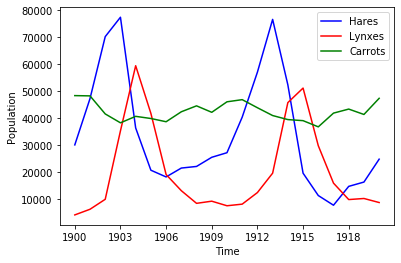

In [4]:
plt.plot(a[:, 0], a[:, 1], color="blue", label = "Hares")
plt.plot(a[:, 0], a[:, 2], color="red", label = "Lynxes")
plt.plot(a[:, 0], a[:, 3], color="green", label = "Carrots")

plt.xlabel("Time")
plt.ylabel("Population")
plt.xticks(np.arange(a[:, 0].min(), a[:, 0].max(), 3))

plt.legend()
plt.show()

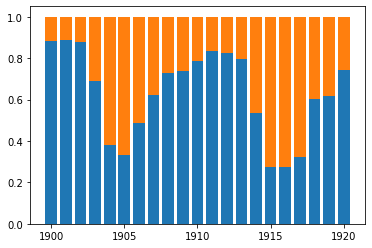

In [6]:
total = a[:, 1:3].sum(axis = 1)
plt.bar(a[:, 0], a[:, 1]/total)
plt.bar(a[:, 0], a[:, 2]/total, bottom = a[:, 1]/total)
plt.show()

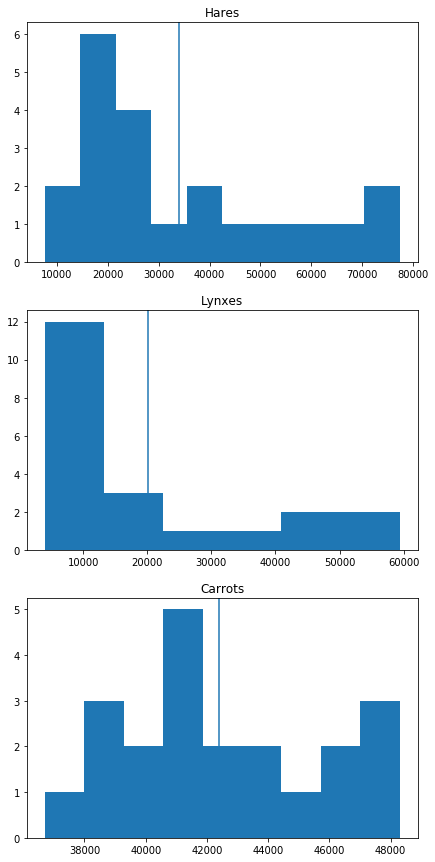

In [7]:
plt.figure(figsize=(7, 15))

plt.subplot(3,1,1)
plt.hist(a[:, 1], bins = 10)
plt.axvline(a[:, 1].mean())
plt.title("Hares")

plt.subplot(3,1,2)
plt.hist(a[:, 2], bins = 6)
plt.axvline(a[:, 2].mean())
plt.title("Lynxes")

plt.subplot(3,1,3)
plt.hist(a[:, 3], bins = 9)
plt.axvline(a[:, 3].mean())
plt.title("Carrots")

plt.show()

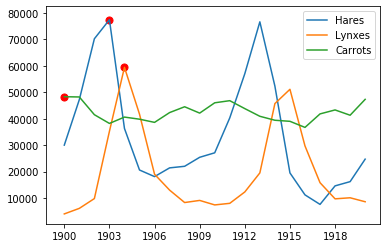

In [8]:
plt.plot(a[:,0], a[:,1], label="Hares")
plt.plot(a[:,0], a[:,2], label="Lynxes")
plt.plot(a[:,0], a[:,3], label="Carrots")

x = a[np.argmax(a[:,1:4], axis = 0),0]
y = np.max(a[:, 1:4], axis = 0)

plt.scatter(x, y, 50, c = 'red')
plt.xticks(np.arange(a[:,0].min(), a[:,0].max(), 3))

plt.legend()
plt.show()

[b'H' b'H' b'H' b'H' b'L' b'L' b'L' b'H' b'H' b'H' b'H' b'H' b'H' b'H'
 b'H' b'L' b'L' b'L' b'H' b'H' b'H']


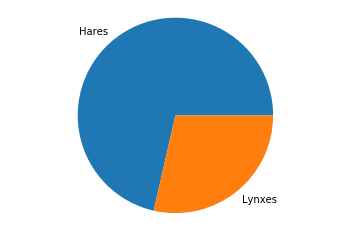

In [9]:
arr = np.chararray(21)

mask = a[:,1] >= a[:,2]
arr[a[:,1] >= a[:,2]] = "H"
arr[a[:,1] < a[:,2]] = "L"
print(arr)

haresNumber = np.sum(np.ones(21)[mask])
lynxesNumber = arr.shape[0] - haresNumber

sizes = np.array([haresNumber, lynxesNumber])
plt.pie(sizes, labels = ["Hares", "Lynxes"])
plt.axis('equal')

plt.show()

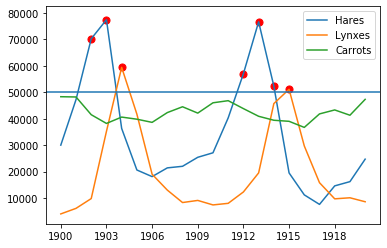

In [10]:
plt.plot(a[:,0], a[:,1], label="Hares")
plt.plot(a[:,0], a[:,2], label="Lynxes")
plt.plot(a[:,0], a[:,3], label="Carrots")

plt.axhline(50000)

plt.scatter(a[:,0][a[:,1] > 50000], a[:,1][a[:,1] > 50000], 50, c='red')
plt.scatter(a[:,0][a[:,2] > 50000], a[:,2][a[:,2] > 50000], 50, c='red')
plt.xticks(np.arange(a[:,0].min(), a[:,0].max(), 3))

plt.legend()
plt.show()

In [11]:
print("Hares mins:")
print(a[np.argmin(a[:,1]),0])

mask = a[:,1] != np.min(a[:,1])
print(a[:,0][mask][np.argmin(a[:,1][mask])])

print("\nLynxes mins:")
print(a[np.argmin(a[:,2]),0])

mask = a[:,2] != np.min(a[:,2])
print(a[:,0][mask][np.argmin(a[:,2][mask])])

print("\nCarrots mins:")
print(a[np.argmin(a[:,3]),0])

mask = a[:,3] != np.min(a[:,3])
print(a[:,0][mask][np.argmin(a[:,3][mask])])

Hares mins:
1917.0
1916.0

Lynxes mins:
1900.0
1901.0

Carrots mins:
1916.0
1903.0


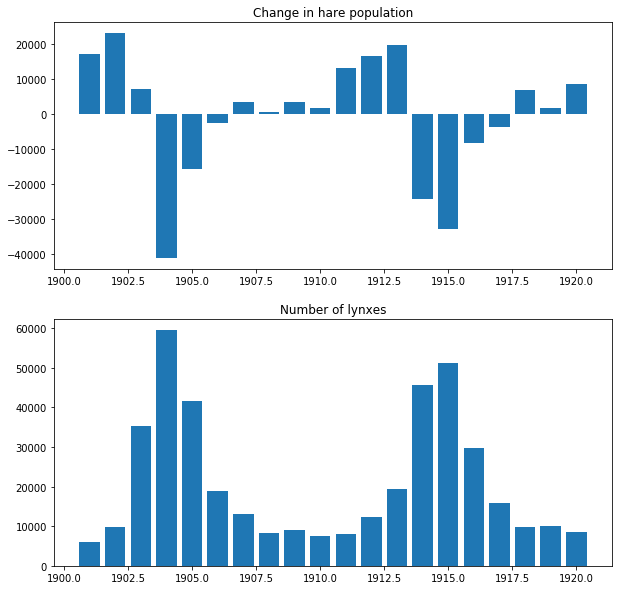


Correlation:
0.07189206073535571


In [12]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
plt.bar(a[1:,0], a[1:,1] - a[:-1,1])
plt.title("Change in hare population")

plt.subplot(2,1,2)
plt.bar(a[1:,0], a[1:,2])
plt.title("Number of lynxes")

plt.show()

print("\nCorrelation:")
print(np.corrcoef(a[:,1],a[:,2])[0,1])

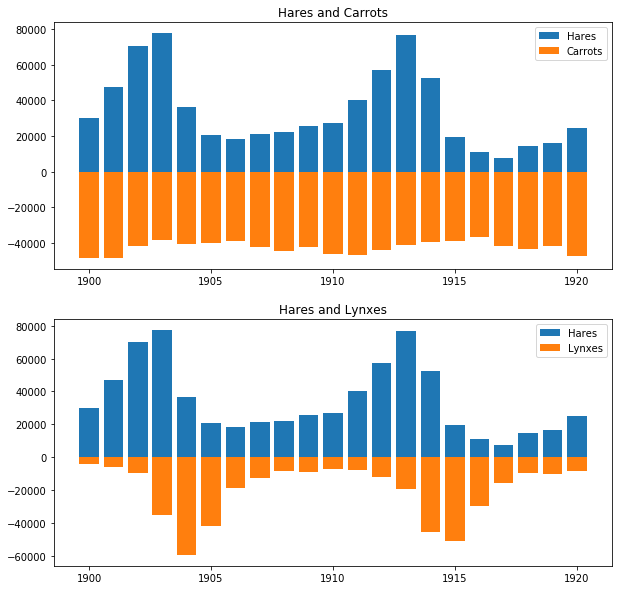

In [13]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
plt.bar(a[:,0], a[:,1], label = "Hares")
plt.bar(a[:,0], -a[:,3], label = "Carrots")
plt.title("Hares and Carrots")
plt.legend()

plt.subplot(2,1,2)
plt.bar(a[:,0], a[:,1], label = "Hares")
plt.bar(a[:,0], -a[:,2], label = "Lynxes")
plt.title("Hares and Lynxes")
plt.legend()

plt.show()

In [15]:
res = 0

if a[19, 2] - a[18,2] < 0:
    if a[19,2] < 20000:
        res = a[19,1] + 10000
    else:
        res = a[19,1] - 10000
else:
    if a[19,2] < 35000:
        res = a[19,1] + 10000
    else:
        res = a[19,1] - 10000

print(res - a[20,1])

1500.0


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784')

In [23]:
from sklearn.decomposition import PCA

In [27]:
a = []

for i in np.arange(50, 401, 50):
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_data.data.astype(float)) 
    a.append(pca.explained_variance_ratio_.sum())

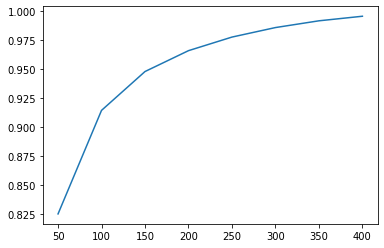

In [30]:
plt.plot(np.arange(50, 401, 50), a)

In [32]:
mnist_digits = mnist_data.data.astype(float)

In [35]:
pca = PCA(n_components = 60)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.8532480551844189

In [36]:
pca = PCA(n_components = 90)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.9037767367387285

In [38]:
pca = PCA(n_components = 155)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.9504242993225445

In [39]:
pca = PCA(n_components = 340)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.990850666821386

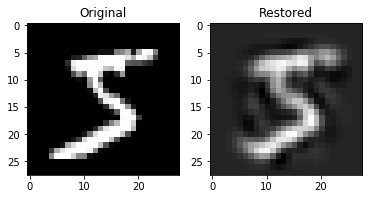

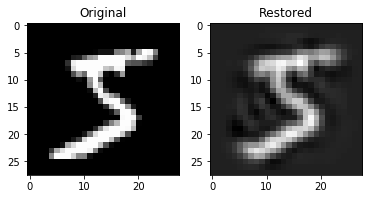

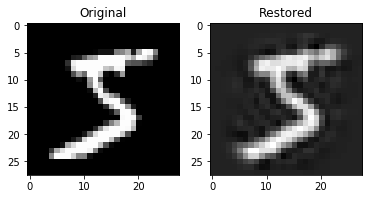

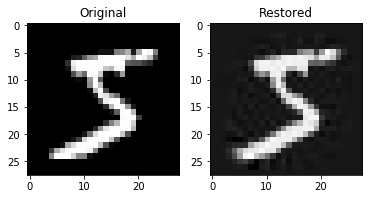

In [40]:
a = [60, 90, 155, 340]

for i in a:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[0])
    
    fix, ax = plt.subplots(1, 2)
    ax[0].imshow(mnist_digits[0].reshape(28, 28), cmap='gray')
    ax[1].imshow(X_restored.reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[1].set_title('Restored')
    plt.show()

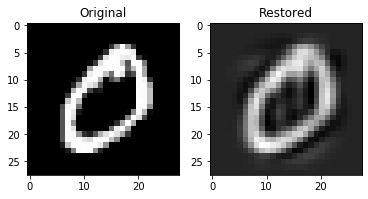

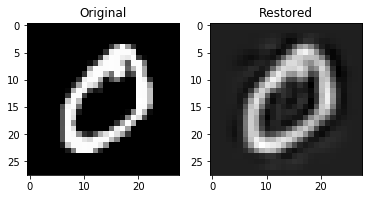

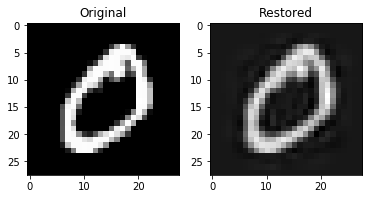

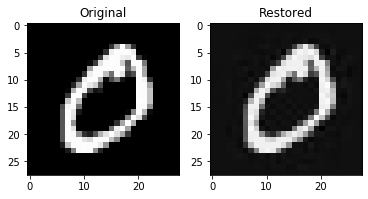

In [42]:
a = [60, 90, 155, 340]

for i in a:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[1])
    
    fix, ax = plt.subplots(1, 2)
    ax[0].imshow(mnist_digits[1].reshape(28, 28), cmap='gray')
    ax[1].imshow(X_restored.reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[1].set_title('Restored')
    plt.show()